##  Advertising Sales Channel Prediction

###  Description

 The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The company has to select proper sales channel to predict the right sales channel to generate good revenue.When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 



### Importing Required Liberary

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


In [3]:
import pandas as pd
df=pd.read_csv("Advertisment.csv")

In [4]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
df.columns


Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [6]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

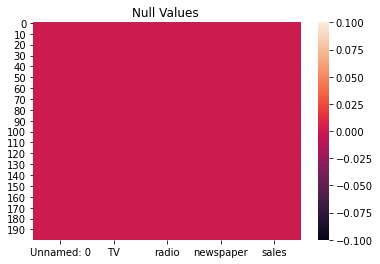

In [7]:
import seaborn as sns
sns.heatmap(df.isnull())
plt.title("Null Values ")
plt.show()


####  Above heatmap shows their is no null values inside the dataset

###  EDA

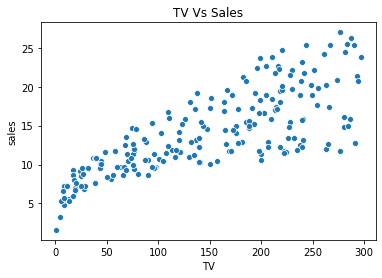

In [8]:
# Bilateral Analysis
import seaborn as sns
sns.scatterplot(x="TV",y="sales",data=df)
plt.title("TV Vs Sales")
plt.show()

####  Here we can see the sales increase exponentially when range of TV increase . We can say that TV and sales are directly praportional to each other

Text(0.5, 1.0, 'Radio Vs Sales')

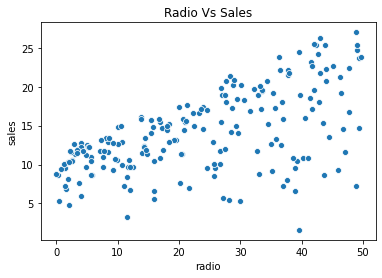

In [9]:
sns.scatterplot(x="radio",y="sales",data=df)
plt.title("Radio Vs Sales")

#### Here we can see that sales is good when radio value is low and its increse when value of radio is increse .Radio impact on sales at very large amount

Text(0.5, 1.0, 'Newspaper vs Sales')

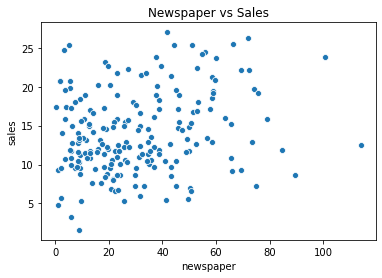

In [10]:
sns.scatterplot(x="newspaper", y="sales",data=df)
plt.title("Newspaper vs Sales")

####  Here we can see that sales is decreased when value of newspapaer increse

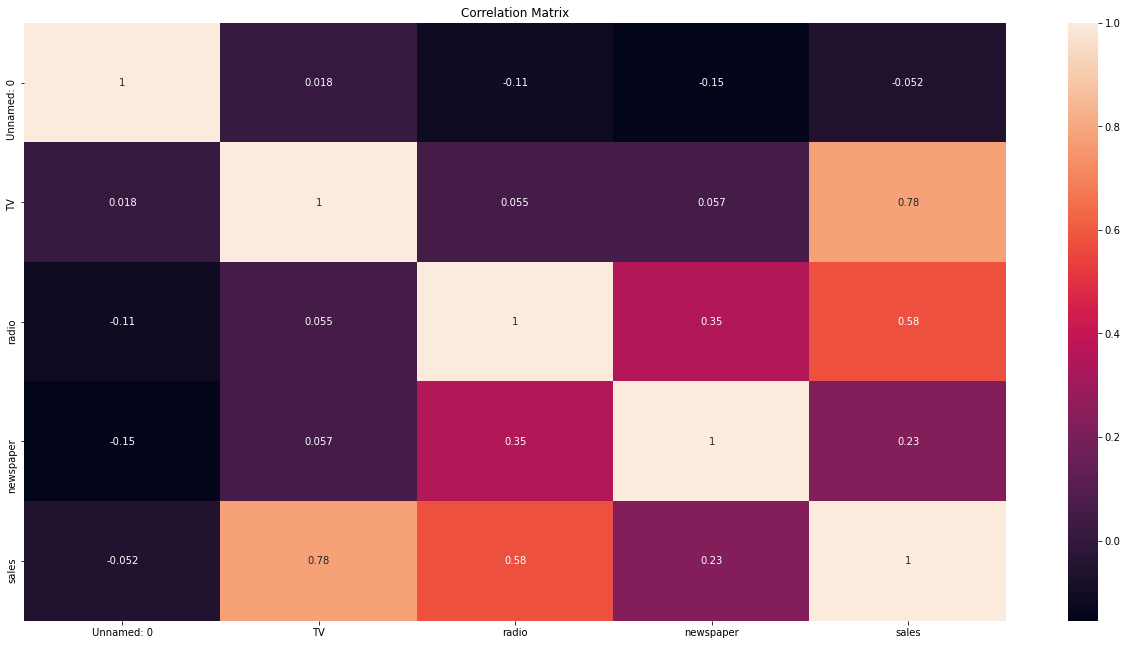

In [11]:
#Multivarient Analysis
corr_mat=df.corr()
plt.figure(figsize=[22,11])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()


####  We can see that Tv and Radio is highly corelated with the Sales

In [12]:
# Splitting the data into the independent and target variable into x and y
x=df.drop("sales",axis=1)
y=df["sales"]

In [13]:
x.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
dtype: float64

### Removing Skewness

In [14]:
from sklearn.preprocessing import power_transform
df_new1=power_transform(x)
df_new1=pd.DataFrame(df_new1,columns=x.columns)

In [15]:
df_new1.skew()

Unnamed: 0   -0.268270
TV           -0.315199
radio        -0.242968
newspaper    -0.077942
dtype: float64

### outliers

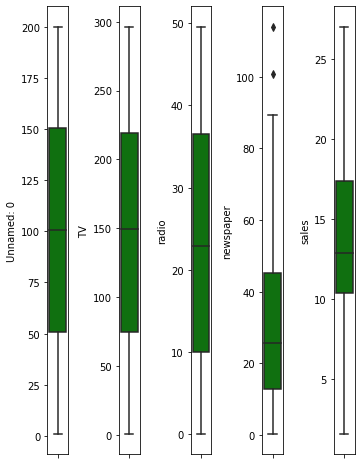

In [16]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color="green",orient="v")
    plt.tight_layout()

In [17]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z

array([[1.72341210e+00, 9.69852266e-01, 9.81522472e-01, 1.77894547e+00,
        1.55205313e+00],
       [1.70609137e+00, 1.19737623e+00, 1.08280781e+00, 6.69578760e-01,
        6.96046111e-01],
       [1.68877065e+00, 1.51615499e+00, 1.52846331e+00, 1.78354865e+00,
        9.07405869e-01],
       [1.67144992e+00, 5.20496822e-02, 1.21785493e+00, 1.28640506e+00,
        8.60330287e-01],
       [1.65412920e+00, 3.94182198e-01, 8.41613655e-01, 1.28180188e+00,
        2.15683025e-01],
       [1.63680847e+00, 1.61540845e+00, 1.73103399e+00, 2.04592999e+00,
        1.31091086e+00],
       [1.61948775e+00, 1.04557682e+00, 6.43904671e-01, 3.24708413e-01,
        4.27042783e-01],
       [1.60216702e+00, 3.13436589e-01, 2.47406325e-01, 8.72486994e-01,
        1.58039455e-01],
       [1.58484630e+00, 1.61657614e+00, 1.42906863e+00, 1.36042422e+00,
        1.77205942e+00],
       [1.56752558e+00, 6.16042873e-01, 1.39530685e+00, 4.30581584e-01,
        6.57617064e-01],
       [1.55020485e+00, 9.4515

In [18]:
threshold=3
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([3, 3], dtype=int64))


In [19]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)

In [20]:
q1

Unnamed: 0    50.750
TV            74.375
radio          9.975
newspaper     12.750
sales         10.375
Name: 0.25, dtype: float64

In [21]:
q3

Unnamed: 0    150.250
TV            218.825
radio          36.525
newspaper      45.100
sales          17.400
Name: 0.75, dtype: float64

In [22]:
df_new=df[(z<3).all(axis=1)]
df_new

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [23]:
df.shape

(200, 5)

In [24]:
df_new.shape


(198, 5)

In [25]:
x=df.drop("sales",axis=1)
y=df["sales"]

In [26]:
print("Rows and columns in independent variable",x.shape)
print("Rows and column in dependent variable",y.shape)

Rows and columns in independent variable (200, 4)
Rows and column in dependent variable (200,)


In [27]:
x_train,x_test,y_train,y_test,=train_test_split(x,y,test_size=.33,random_state=42)

In [28]:
print("Rows and Columns in traing phase :-",x_train.shape)
print("Rows and Column testing phase :- ",y_train.shape)

Rows and Columns in traing phase :- (134, 4)
Rows and Column testing phase :-  (134,)


In [29]:
lm=LinearRegression()

In [30]:
lm.fit(x_train,y_train)

LinearRegression()

In [31]:
lm.coef_

array([-0.00037402,  0.044666  ,  0.19662408,  0.00596564])

In [32]:
lm.intercept_

2.7990206595293508

In [33]:
lm.score(x_train,y_train)

0.9095400075045317

In [34]:
# Predict The Value
pred=lm.predict(x_test)
print("Predict Result price",pred)
print("Actual Proce",y_test)

Predict Result price [16.585975   21.21532322 21.69227359 10.78721853 22.24436064 13.30628235
 21.2504897   7.35896941 13.41395576 15.21479112  9.03101674  6.53873996
 14.38551706  8.94580619  9.53158119 12.07825531  8.87587732 16.23384905
 10.31667839 18.8497049  19.79672229 13.69754141 12.43554051 21.57865582
  7.69026184  5.68674887 20.9598931  11.90745906  9.12144274  8.48517263
 12.35724077 10.0227661  21.73331021 12.65125091 18.23409167 20.17501241
 14.19756077 21.01107333 10.89474985  4.43662297  9.60216605 12.49762923
 10.16879519  8.15899632 13.32316067  5.24178782  9.33060279 14.18410081
  8.74319968 11.67710859 15.65671046 11.72808538 13.24771147 11.05045257
  6.41295864  9.85860465  9.4443335  24.324371    7.66332787 12.31212277
 17.55637468 15.28145887 11.4813757  11.15185016 16.6268277   6.89967715]
Actual Proce 95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
       ... 
97     15.5
31     11.9
12      9.2
35     12.8
119     6.6
Name: sales, Length: 66, dtype

In [35]:
print("error:")
print(mean_squared_error(y_test,pred))

error:
3.7282734331583227


In [36]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.8555434716491416


In [41]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"at cross fold{j} the cv score is{cv_mean} and accuracy score for training{Train_accuracy}and accuracy for the testing is{Test_accuracy}")
    print("\n")     


ValueError: Found input variables with inconsistent numbers of samples: [140, 60]